<a href="https://colab.research.google.com/github/RATNAKER555/MLEND/blob/main/ECS7020P_miniproject_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Author**

**Student Name: Ratnaker Gautam**

**Student ID: 230916641**  

# **2) Problem formulation**


There are basically four analyses that are covered in this notebook. These are questions we ask ourselves in our daily lives. My purpose is to find the relationship between the healthiness and how much we like a certain dish, test the impact of food presentation on how much we like it, whether healthy food really looks bad or not, and finally performing predictions on the ingredients a certain dish contains, just by taking a look at the image. Predicting the ingredients by taking a look at the dish itself can be prove to be extremely useful in the real world:

* **Dietary Restrictions and Allergies:** Individuals with specific dietary restrictions or allergies can benefit from this. By analyzing the ingredients in a dish from an image, people can quickly determine if it aligns with their dietary needs, helping them make informed choices about what they consume.

* **Cultural and Culinary Exploration:** For travelers or those interested in exploring different cuisines, this can provide information about unfamiliar dishes, their ingredients, and cooking methods, fostering cultural exploration and understanding.

* **Education and Learning:** In culinary schools or cooking classes, this can aid students in understanding and recognizing various ingredients used in different dishes. It can enhance their learning experience by providing instant information and guidance.

**These analyses are leveraged on the MLEnd Yummy dataset.**

# **3) The Dataset**
The dataset being used here is exactly similar to what I used in the *basic*
 *.ipynb* file and it is being used exactly in the same way as well with no changes at all. If you're reviewing this first, I'd recommend you to read this section in the basic .ipynb file

# **4) Machine Learning Pipeline - Transformation**
 These are the steps which will remain the same for all the analyses


* We extract the archive contents containing the dataset    
  and the attributes file into the current working directory *Data*.
*  Then, the attributes .csv file is loaded in a dataframe   
  with the *filename* column being set as the index. There's not a significant reason behind this, but the fact that it eases our operations.
*  The next step is to remove all the clutter from the dataframe, the clutter is essentially the non-necessary columns which are totally irrelevant to our study. These columns are: *Diet, Cuisine_org, Cuisine, Home_or_restaurant, Healthiness_rating and Likeness*. The resultant dataframe is the main dataframe and for each different analysis we will create a new dataframe, with only the few columns we require.



**A) Relationship between Healthiness and Liking a Dish**

We create a new dataframe with columns *Healthiness_rating_int, Likeness_int,
 Benchmark_A*. Since the index is reset the *filename* will convert from index to a new separate column



**B) Relationship between Food Presentation and Likeness**

The idea is to train a neural network on the whole Yummy Dataset, and then ask it to make predictions on the images. This basically becomes a classification problem if we use the following mapping {'strongly_dislike': 0, 'dislike': 1, 'neutral' : 2, 'like' : 3, 'strongly_like': 4}. A classifier could also have been used, but a neural network in some ways works like the human brain. So, I found it more appropriate to use Neural Networks for this task, and then based on the results decide whether Food Presentation matters Likeness or not.



*   We make a new dataframe with the columns *filename, Likeness_int and Benchmark_A.*
*   Next step is EDA which basically deals with finding the occurence of each class in the dataset. The following is the frequency of occurence of each class in the dataframe:


---


4.0   |   1395

3.0     |  1191

2.0    |   450

1.0    |   163

0.0    |    47



---
We can observe class imbalance here as well, the *strongly dislike* class seems to be not represented at all in the dataset.

* The dataframe also contains 4 null values, so the rows containing the null values have to be removed.

* The next step is feature extraction, which has been implemented exactly in the same way as it was done in the basic .ipynb file. We create a numoy array for every single image, then proceed to normalize it and resize every single image.

* The *Likeness_int* column from DataFrame is extracted as the labels. *to_categorical* from Keras is used to convert these labels into one-hot encoded format, essential for classification tasks.

* Finally, we split the processed images *(X)* and labels *(y)* into training and testing sets based on the condition where *Benchmark_A* column equals *Train* or *Test*.


**C) Does Healthy Food Look Bad?**

This step for this analysis is exactly similar to what we did in *B)*. However, there are some minor changes, such as here instead of *Likeness_int* we add the *Healthiness_rating_int* column in our new dataframe. Also, the mapping looks like this: {'very_unhealthy': 0, 'unhealthy': 1, 'neutral' : 2, 'healthy' : 3, 'very_healthy': 4}.

The frequency of occurence of each class in the dataframe is:

---

3.0   | 1267

2.0    | 782

4.0     | 607

1.0     | 467

0.0     | 123

---

**D) Predicting the ingredients from the images**

This was a fun exercise, the objective is as simple as it is written, pass an image, and predict the ingredients that might be present in that. This is basically a multiclass classification problem

*   We begin by creating a new dataframe with the columns *filename, Dish_name, Ingredients, Benchmark_A*
*   There was some null values and the rows corresponding to those values had to be dropped.

The number of unique ingredients in the dataset is humongous, it is not possible to train a model to efficiently predict all those at once. So, what I did was create two versions of model, one which could detect 24 top ingredients and the other which detected 7 top ingredients.

* To implement this we have to count the frequency of occurence of each unique ingredient and select the top 24 occuring and top 7 occuring ingredients. The top 24 ingredients in the dataset are:

---
salt         |      1172

onion         |      734

rice           |     508

tomato          |    491

garlic           |   482

chicken          |   479

oil              |   473

olive_oil        |   315

water            |   304

ginger           |   264

butter           |   261

egg              |   259

onions           |   254

potato           |  245

pepper           |   243

spices           |   240

cheese           |   218

sugar            |   208

turmeric_powder  |   205

tomatoes         |   199

flour            |   193

carrot           |   180

lettuce          |   174

milk             |   172

---

* The next step is to remove all rows in the dataframe which don't contain any of the top 24 ingredients.

* This is followed by removing ingredients other than the top 24 ones in the dataframe.

* Now it might be possible that a certain dish contains, multiple top 24 ingredients at once, to tackle this, we duplicate that certain dish but each time we use a different ingredient in the *Ingredient* column.

For example:

---

Dish_name  | Ingredients

samosa     |  salt, onion, garlic, turmeric powder

---


This would be reinterpreted as:

---
Dish_name | Ingredients

samosa    | salt

samosa    | onion

samosa    | garlic

samosa     | turmeric powder

---

For dealing with 4 top ingredients, we just change the 24 in tbis code to a 7!, rest of the implementation remains the same

**top_ingredients = all_ingredients.head(24).index.tolist()**



Since I was planning to use *MobileNetV2* for this image classification task, the preprocessing was different what I have done till now:

* **Data Preparation:**

*expanded_df* contains at least columns *filename* and *Ingredients*.
*train_test_split* function is used to split the data into training and validation sets with a test size of 20% and a random state of 42.

* **Image Data Augmentation:**

*ImageDataGenerator* is configured to perform various augmentation techniques on the images in the dataset. Augmentation helps in artificially increasing the diversity of the training dataset, thereby improving the model's generalization.

* **Data Generators Creation:**

*datagen.flow_from_dataframe* is used to create data generators for both training and validation data.
*train_generator* and *valid_generator* are created using *flow_from_dataframe* method, which generates batches of augmented/unaltered data from the directory containing images.

* **Parameters:**

rescale: Normalizes pixel values of images.
*rotation_range*, *width_shift_range*, *height_shift_range*, *shear_range*, *zoom_range*, *horizontal_flip*, fill_mode: Parameters used for augmentation to introduce variety in the training data.

* **Generator Configuration:**

target_size: Images will be resized to (224, 224) during training and validation.
batch_size: Number of samples per batch.
class_mode=*categorical*: Specifies that the problem is a multi-class classification task.

* **Directory Structure:**

The images are expected to be in the directory '/content/Data/yummy/MLEndYD_images'.

* **Data Shuffling:**

shuffle=True for the training generator and shuffle=False for the validation generator. This indicates whether to shuffle the data before each epoch or not.

# **5) Modelling**

**A) Relationship between Healthiness and Liking a Dish**

There were no models built for this analysis, as we can derive conclusions with a scatter plot and the correlation

**B) Relationship between Food Presentation and Likeness**


I defined a simple neural network model using Keras' Sequential API for a multi-class classification problem.

* **Input Layer (Flatten):**

Flatten(input_shape=(200, 200, 3)): This layer reshapes the input images of size 200x200 pixels with 3 color channels (RGB) into a single 1D array of 2002003 = 120,000 elements. It prepares the image data to be fed into the subsequent fully connected layers.

* **Hidden Layers (Dense Layers with ReLU Activation):**

Dense(128, activation='relu'): This is the first hidden layer consisting of 128 neurons with rectified linear unit (ReLU) activation function. It takes the flattened input and performs a linear transformation followed by the ReLU activation.
Dense(64, activation='relu'): The second hidden layer comprises 64 neurons with ReLU activation. It further processes the information extracted by the previous layer.

* **Output Layer (Dense with Softmax Activation):**

Dense(num_classes, activation='softmax'): This is the output layer responsible for classifying the input into num_classes categories. It consists of num_classes neurons, each corresponding to a class, and uses the softmax activation function. Softmax normalizes the output scores into probabilities, making it suitable for multi-class classification problems. The class with the highest probability will be the predicted class.

**Model: "sequential_2"**
_________________________________________________________________

 **Layer (type)**         |     **Output Shape**        |     **Param #**

=================================================================

 flatten_2 (Flatten)    |     (None, 120000)       |     0         
                                                                 
 dense_6 (Dense)        |     (None, 128)          |     15360128  
                                                                 
 dense_7 (Dense)        |     (None, 64)           |     8256      
                                                                 
 dense_8 (Dense)        |     (None, 5)             |    325       
                                                                 
=================================================================

Total params: 15368709 (58.63 MB)

Trainable params: 15368709 (58.63 MB)

Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



**C) Does Healthy Food Look Bad?**

This was a similar problem as earlier, so we can use the previous model as it is.

**D) Predicting the ingredients from the images**

We define a convolutional neural network (CNN) model using MobileNetV2 as a base model for transfer learning.

* **Base Model Setup:**

The code initializes MobileNetV2, a pre-trained model on the ImageNet dataset, with the weights='imagenet' argument. It excludes the top (fully connected) layers of the network by setting include_top=False.
input_shape=(224, 224, 3) specifies the input shape for the images that the model will accept. The image arrays are normalised as well.

* **Model Customization:**

GlobalAveragePooling2D() is used to reduce the spatial dimensions of the tensor output from the base model.
Dense(1024, activation='relu') adds a fully connected layer with 1024 units and ReLU activation function on top of the GlobalAveragePooling layer.
Dense(len(train_generator.class_indices), activation='softmax') adds the output layer with the number of units equal to the number of classes in the dataset. The softmax activation function is used for multi-class classification to output class probabilities.

* **Creating the Model:**

Model(inputs=base_model.input, outputs=predictions) defines the overall architecture of the model, specifying the inputs and outputs.

* **Freezing Base Layers:**

for layer in base_model.layers: layer.trainable = False freezes all layers in the base model. This means weights of these layers won't be updated during the training process. Only the newly added layers (defined above) will be trained.

# **6) Methodology**

**A) Relationship between Healthiness and Liking a Dish**

We plot the scatter plot for *Healthiness_rating_int vs Likeness_int* and obtain the correlation coefficient for the two features



**B) Relationship between Food Presentation and Likeness**

* **model.compile:** This function configures the model for training, specifying the optimizer, loss function, and metrics to be used. In this case, *adam* is the optimizer, *categorical_crossentropy* is the loss function used for multi-class classification problems, and *accuracy* is the metric to be evaluated during training.

* **model.fit:** This function trains the model using the training data (X_train and y_train) for a specified number of epochs (10 in this case) with a batch size of 32. It also uses the validation data (X_test and y_test) to evaluate the model's performance on data it hasn't seen during training.

* **loss, accuracy:**  model.evaluate(X_test, y_test): We evaluate the trained model on the test data (X_test and y_test) and calculates the loss and accuracy of the model on this data.



**C)  Does Healthy Food Look Bad?**

This step is entirely similar to what we did in B)

**D) Predicting the ingredients from the images**

* **Compilation:**

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) configures the model for training.

optimizer=Adam() specifies the optimizer to be used during training. Here, Adam optimizer is used with default learning rate.

loss='categorical_crossentropy' sets the loss function to categorical cross-entropy, which is commonly used for multi-class classification problems.

metrics=['accuracy'] defines the evaluation metric to monitor during training, in this case, accuracy.

* **Training:**

model.fit() is used to train the compiled model.

train_generator is passed as the training data source.

steps_per_epoch=train_generator.samples // (batch_size=32) specifies the number of steps (batches) to yield from the generator before declaring one epoch finished during training. It's typically set as the total number of samples divided by the batch size.

epochs=10 indicates the number of times the entire training dataset is passed forward and backward through the neural network.

validation_data=valid_generator provides the validation dataset for evaluating the model after each epoch during training.

validation_steps=valid_generator.samples // (batch_size=32) specifies the number of batches to draw from the validation generator for validation.

The model will optimize its weights using the Adam optimizer while minimizing the categorical cross-entropy loss, for 10 epochs. It will also monitor accuracy as a performance metric.

## **7) Results**

**Installing the MLEND library with tqdm to perfrom operations on the Yummy Dataset**

In [ ]:
!pip install mlend
!pip install tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load
from mlend import download_yummy_small, yummy_small_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

In [ ]:
pwd

'/content'

**Mounting the Drive which contains the zipped dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Extracting the zipped file in the *Data* directory**

In [ ]:
import zipfile
import os
from tqdm import tqdm

zip_file_path = '/content/drive/MyDrive/Data/yummy.zip'
extracted_folder_path = '/content/Data'

# Create the target directory
os.makedirs(extracted_folder_path, exist_ok=True)

# Get the total number of files in the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    file_count = len(zip_ref.infolist())

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    for file in tqdm(zip_ref.infolist(), desc='Extracting', total=file_count):
        zip_ref.extract(file, extracted_folder_path)

print("Extraction complete.")


Extracting: 100%|██████████| 3251/3251 [00:13<00:00, 235.32it/s]

Extraction complete.


In [ ]:
MLENDYD_df = pd.read_csv('/content/Data/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

Diet Cuisine_org   Cuisine  \
filename                                           
000001.jpg  non_vegetarian    japanese  japanese   
000002.jpg  non_vegetarian     english   english   
000003.jpg  non_vegetarian     chinese   chinese   
000004.jpg      vegetarian      indian    indian   
000005.jpg  non_vegetarian      indian    indian   
...                    ...         ...       ...   
003246.jpg      vegetarian      indian    indian   
003247.jpg      vegetarian      indian    indian   
003248.jpg      vegetarian      indian    indian   
003249.jpg           vegan      indian    indian   
003250.jpg  non_vegetarian    american  american   

                                   Dish_name     Home_or_restaurant  \
filename                                                              
000001.jpg                chicken_katsu_rice          marugame_udon   
000002.jpg                 english_breakfast                   home   
000003.jpg                     spicy_chicken  jinli_flagship_branch   
000004.jpg                       gulab_jamun                   home   
000005.jpg                    chicken_masala                   home   
...                                      ...                    ...   
003246.jpg                        zeera_rice                   home   
003247.jpg                    paneer_and_dal                   home   
003248.jpg                            samosa                   home   
003249.jpg                        fruit_milk                   home   
003250.jpg  beef_burger_with_onion_and_salad                   home   

                                                  Ingredients  \
filename                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce   
000002.jpg  eggs,bacon,hash_brown,tomato,bread,tomato,bake...   
000003.jpg  chili,chicken,peanuts,sihuan_peppercorns,green...   
000004.jpg      sugar,water,khoya,milk,salt,oil,cardamon,ghee   
000005.jpg  chicken,lemon,turmeric,garam_masala,coriander_...   
...                                                       ...   
003246.jpg  1_cup_basmati_rice,2_cups_water,2_tablespoons_...   
003247.jpg  fried_cottage_cheese,ghee,lentils,milk,wheat_f...   
003248.jpg  potato,onion,peanut,salt,turmeric_powder,red_c...   
003249.jpg                             kiwi,banana,apple,milk   
003250.jpg   beef_patty,bread_roll,cherry_tomato,_onion,chive   

           Healthiness_rating  Healthiness_rating_int       Likeness  \
filename                                                               
000001.jpg            neutral                     3.0           like   
000002.jpg          unhealthy                     2.0           like   
000003.jpg            neutral                     3.0  strongly_like   
000004.jpg          unhealthy                     2.0  strongly_like   
000005.jpg            healthy                     4.0  strongly_like   
...                       ...                     ...            ...   
003246.jpg            healthy                     4.0  strongly_like   
003247.jpg            healthy                     4.0  strongly_like   
003248.jpg     very_unhealthy                     1.0           like   
003249.jpg       very_healthy                     5.0  strongly_like   
003250.jpg            neutral                     3.0           like   

            Likeness_int Benchmark_A  
filename                              
000001.jpg           4.0       Train  
000002.jpg           4.0       Train  
000003.jpg           5.0       Train  
000004.jpg           5.0       Train  
000005.jpg           5.0       Train  
...                  ...         ...  
003246.jpg           5.0       Train  
003247.jpg           5.0        Test  
003248.jpg           4.0        Test  
003249.jpg           5.0       Train  
003250.jpg           4.0       Train  

[3250 rows x 11 columns]

**Removing all the clutter unnecessary to the analysis**

In [ ]:
MLENDYD_df=MLENDYD_df.drop(columns=['Diet','Cuisine_org','Cuisine','Home_or_restaurant','Healthiness_rating','Likeness'],axis=1)
MLENDYD_df.head()

Dish_name  \
filename                         
000001.jpg  chicken_katsu_rice   
000002.jpg   english_breakfast   
000003.jpg       spicy_chicken   
000004.jpg         gulab_jamun   
000005.jpg      chicken_masala   

                                                  Ingredients  \
filename                                                        
000001.jpg              rice,chicken_breast,spicy_curry_sauce   
000002.jpg  eggs,bacon,hash_brown,tomato,bread,tomato,bake...   
000003.jpg  chili,chicken,peanuts,sihuan_peppercorns,green...   
000004.jpg      sugar,water,khoya,milk,salt,oil,cardamon,ghee   
000005.jpg  chicken,lemon,turmeric,garam_masala,coriander_...   

            Healthiness_rating_int  Likeness_int Benchmark_A  
filename                                                      
000001.jpg                     3.0           4.0       Train  
000002.jpg                     2.0           4.0       Train  
000003.jpg                     3.0           5.0       Train  
000004.jpg                     2.0           5.0       Train  
000005.jpg                     4.0           5.0       Train

**Healthy things don't taste good? Let's find out**

In [ ]:
ht = MLENDYD_df[['Healthiness_rating_int','Likeness_int','Benchmark_A']]

In [ ]:
ht.reset_index(drop=False)

filename  Healthiness_rating_int  Likeness_int Benchmark_A
0     000001.jpg                     3.0           4.0       Train
1     000002.jpg                     2.0           4.0       Train
2     000003.jpg                     3.0           5.0       Train
3     000004.jpg                     2.0           5.0       Train
4     000005.jpg                     4.0           5.0       Train
...          ...                     ...           ...         ...
3245  003246.jpg                     4.0           5.0       Train
3246  003247.jpg                     4.0           5.0        Test
3247  003248.jpg                     1.0           4.0        Test
3248  003249.jpg                     5.0           5.0       Train
3249  003250.jpg                     3.0           4.0       Train

[3250 rows x 4 columns]

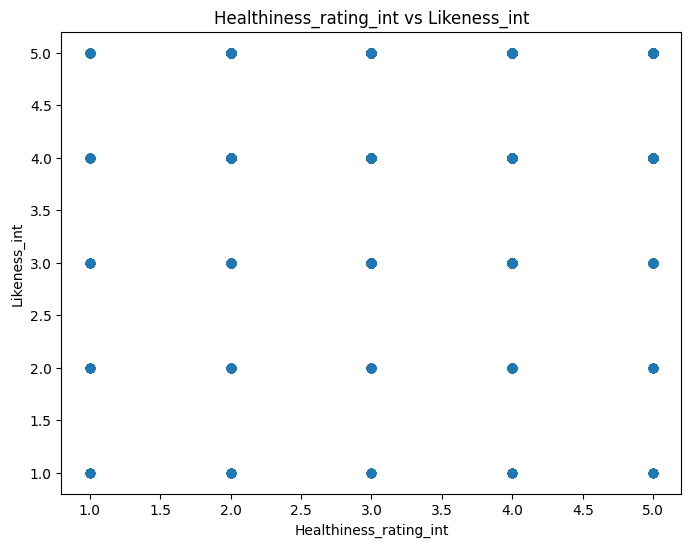

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(ht['Healthiness_rating_int'], ht['Likeness_int'])

plt.xlabel('Healthiness_rating_int')
plt.ylabel('Likeness_int')
plt.title('Healthiness_rating_int vs Likeness_int')

plt.show()

**Calculating the correlation coefficient between the two features**

In [ ]:
correlation = ht['Healthiness_rating_int'].corr(ht['Likeness_int'])

print(f"The correlation coefficient between Healthiness_rating_int and Likeness_int is: {correlation}")

**This means there is an extremely weak almost non-existing relationship between taste and healthiness of a dish**

**Does Food Presentation Matter in deciding whether we like a dish or not?**

**We can study this by using a neural network**

**Let's create the mapping first**

In [ ]:
mapping = {'strongly_dislike': 0, 'dislike': 1, 'neutral' : 2, 'like' : 3, 'strongly_like': 4}

**We start with 0 as it gets easier to one hot encode later on**

In [ ]:
pl = MLENDYD_df[['Likeness_int','Benchmark_A']]

In [ ]:
pl=pl.reset_index(drop=False)

In [ ]:
pl.head()

filename  Likeness_int Benchmark_A
0  000001.jpg           4.0       Train
1  000002.jpg           4.0       Train
2  000003.jpg           5.0       Train
3  000004.jpg           5.0       Train
4  000005.jpg           5.0       Train

**Our Idea is to train a neural network on the above data and ask it to predict the Likeness_int of a dish, after processing an image. We'll evaluate its performance and that will help us decide whether food presentation matters or not**

In [ ]:
pl['Likeness_int'].value_counts()

5.0    1395
4.0    1191
3.0     450
2.0     163
1.0      47
Name: Likeness_int, dtype: int64

In [ ]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filename      3250 non-null   object 
 1   Likeness_int  3246 non-null   float64
 2   Benchmark_A   3250 non-null   object 
dtypes: float64(1), object(2)
memory usage: 76.3+ KB


**We can observe here that there are 4 null values for Likeness_int, which become a headache later. Let's deal with them**

In [ ]:
pl= pl.dropna(subset=['Likeness_int'])
pl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3246 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filename      3246 non-null   object 
 1   Likeness_int  3246 non-null   float64
 2   Benchmark_A   3246 non-null   object 
dtypes: float64(1), object(2)
memory usage: 101.4+ KB


**We subtract 1 from all the values in the 'Likeness_int' column for one-hot encoding**

In [ ]:
pl['Likeness_int']=pl['Likeness_int']-1
pl['Likeness_int'].value_counts()

4.0    1395
3.0    1191
2.0     450
1.0     163
0.0      47
Name: Likeness_int, dtype: int64

**Making the Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

**Fixing the directory path**

In [ ]:
image_paths = ['/content/Data/yummy/MLEndYD_images/' + filename for filename in pl['filename']]

**Image Preprocessing**

In [ ]:
def process_images(file_paths):
    images = []
    for file_path in file_paths:
        img = load_img(file_path, target_size=(200, 200))  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Convert to array and normalize
        images.append(img_array)
    return np.array(images)

**Process images and labels**

In [ ]:
X = process_images(image_paths)
y = pl['Likeness_int'].values

**Convert labels to categorical (one-hot encoding)**

In [ ]:
from tensorflow.keras.utils import to_categorical
unique=np.unique(y)
num_classes=len(unique)
print (unique, 'num_classes= ', num_classes)
y = to_categorical(y)

[0. 1. 2. 3. 4.] num_classes=  5


**Split data into train and test sets based on *Benchmark_A***

In [ ]:
X_train = X[pl['Benchmark_A'] == 'Train']
y_train = y[pl['Benchmark_A'] == 'Train']
X_test = X[pl['Benchmark_A'] == 'Test']
y_test = y[pl['Benchmark_A'] == 'Test']

**Define a simple neural network model using Keras**

In [ ]:
model = Sequential([
    Flatten(input_shape=(200, 200, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               15360128  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15368709 (58.63 MB)
Trainable params: 15368709 (58.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Compliling the model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Training the model**

In [ ]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
71/71 [==============================] - 2s 23ms/step - loss: 11.7794 - accuracy: 0.3376 - val_loss: 6.5808 - val_accuracy: 0.3686
Epoch 2/10
71/71 [==============================] - 1s 14ms/step - loss: 4.6089 - accuracy: 0.3424 - val_loss: 1.9751 - val_accuracy: 0.4148
Epoch 3/10
71/71 [==============================] - 1s 14ms/step - loss: 3.2221 - accuracy: 0.3649 - val_loss: 2.2364 - val_accuracy: 0.3634
Epoch 4/10
71/71 [==============================] - 1s 14ms/step - loss: 2.2678 - accuracy: 0.4005 - val_loss: 2.0630 - val_accuracy: 0.4117
Epoch 5/10
71/71 [==============================] - 1s 14ms/step - loss: 2.9551 - accuracy: 0.3939 - val_loss: 2.0784 - val_accuracy: 0.3932
Epoch 6/10
71/71 [==============================] - 1s 14ms/step - loss: 2.6487 - accuracy: 0.3882 - val_loss: 2.3260 - val_accuracy: 0.3634
Epoch 7/10
71/71 [==============================] - 1s 14ms/step - loss: 1.3569 - accuracy: 0.4912 - val_loss: 1.5519 - val_accuracy: 0.3573
Epoch 8/10
7

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

31/31 [==============================] - 0s 7ms/step - loss: 1.4787 - accuracy: 0.4107
Test Loss: 1.4787248373031616
Test Accuracy: 0.41067761182785034


**Make predictions**

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

31/31 [==============================] - 0s 6ms/step


**Convert one-hot encoded y_test back to categorical labels for classification report**

In [ ]:
true_labels = np.argmax(y_test, axis=1)

**Classification report**

In [ ]:
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        44
           2       0.10      0.03      0.05       129
           3       0.37      0.10      0.16       359
           4       0.43      0.84      0.57       426

    accuracy                           0.41       974
   macro avg       0.18      0.20      0.16       974
weighted avg       0.34      0.41      0.32       974



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


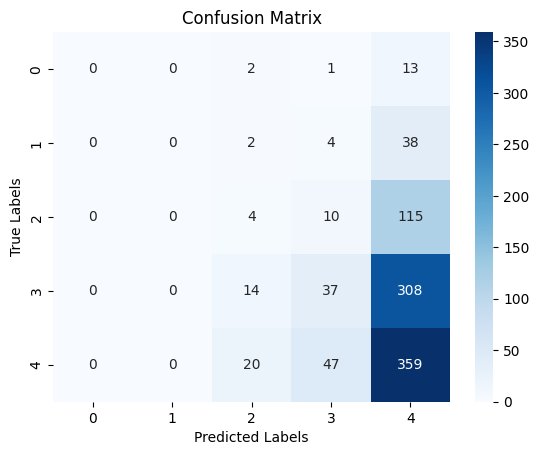

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**The Precision-Recall Curve visualizes how precision and recall change across different thresholds used by the classification model**

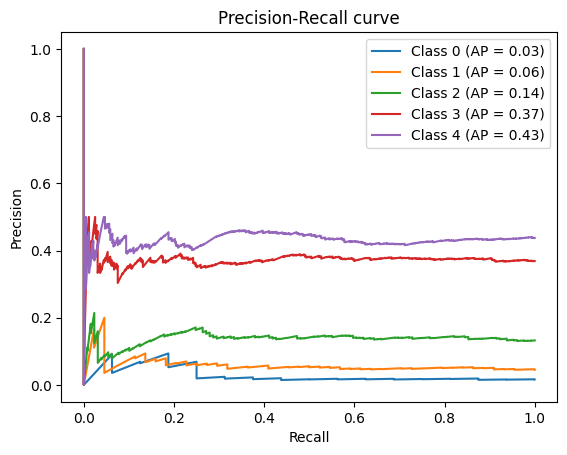

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

plt.figure()
for i in range(5):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()


**Healthy food looks bad?**

**This is similar to what we did before, so we can repeat the steps, with some minor changes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
mapping = {'very_unhealthy': 0, 'unhealthy': 1, 'neutral' : 2, 'healthy' : 3, 'very_healthy': 4}

In [ ]:
ph = MLENDYD_df[['Healthiness_rating_int','Benchmark_A']]
ph=ph.reset_index(drop=False)
ph.head()

filename  Healthiness_rating_int Benchmark_A
0  000001.jpg                     3.0       Train
1  000002.jpg                     2.0       Train
2  000003.jpg                     3.0       Train
3  000004.jpg                     2.0       Train
4  000005.jpg                     4.0       Train

In [ ]:
ph['Healthiness_rating_int'].value_counts()

4.0    1267
3.0     785
5.0     607
2.0     467
1.0     123
Name: Healthiness_rating_int, dtype: int64

In [ ]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3250 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   filename                3250 non-null   object 
 1   Healthiness_rating_int  3249 non-null   float64
 2   Benchmark_A             3250 non-null   object 
dtypes: float64(1), object(2)
memory usage: 76.3+ KB


In [ ]:
ph= ph.dropna(subset=['Healthiness_rating_int'])
ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3249 entries, 0 to 3249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   filename                3249 non-null   object 
 1   Healthiness_rating_int  3249 non-null   float64
 2   Benchmark_A             3249 non-null   object 
dtypes: float64(1), object(2)
memory usage: 101.5+ KB


In [ ]:
indices_to_drop = ph[ph['Healthiness_rating_int'] == 3].index[:3]

In [ ]:
ph = ph.drop(indices_to_drop)

In [ ]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3246 entries, 1 to 3249
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   filename                3246 non-null   object 
 1   Healthiness_rating_int  3246 non-null   float64
 2   Benchmark_A             3246 non-null   object 
dtypes: float64(1), object(2)
memory usage: 101.4+ KB


In [ ]:
ph['Healthiness_rating_int']=ph['Healthiness_rating_int']-1
ph['Healthiness_rating_int'].value_counts()

3.0    1267
2.0     782
4.0     607
1.0     467
0.0     123
Name: Healthiness_rating_int, dtype: int64

In [ ]:
image_paths = ['/content/Data/yummy/MLEndYD_images/' + filename for filename in ph['filename']]

In [ ]:
def process_images(file_paths):
    images = []
    for file_path in file_paths:
        img = load_img(file_path, target_size=(200, 200))  # Load and resize image
        img_array = img_to_array(img) / 255.0  # Convert to array and normalize
        images.append(img_array)
    return np.array(images)
X = process_images(image_paths)
y = ph['Healthiness_rating_int'].values

In [ ]:
from tensorflow.keras.utils import to_categorical
unique=np.unique(y)
num_classes=len(unique)
print (unique, 'num_classes= ', num_classes)
y = to_categorical(y)

[0. 1. 2. 3. 4.] num_classes=  5


In [ ]:
X_train = X[ph['Benchmark_A'] == 'Train']
y_train = y[ph['Benchmark_A'] == 'Train']
X_test = X[ph['Benchmark_A'] == 'Test']
y_test = y[ph['Benchmark_A'] == 'Test']

In [ ]:
model = Sequential([
    Flatten(input_shape=(200, 200, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
71/71 [==============================] - 7s 29ms/step - loss: 11.5657 - accuracy: 0.2638 - val_loss: 4.8476 - val_accuracy: 0.1672
Epoch 2/10
71/71 [==============================] - 1s 14ms/step - loss: 3.0307 - accuracy: 0.3113 - val_loss: 2.1336 - val_accuracy: 0.2554
Epoch 3/10
71/71 [==============================] - 1s 14ms/step - loss: 4.1697 - accuracy: 0.2994 - val_loss: 2.7060 - val_accuracy: 0.3795
Epoch 4/10
71/71 [==============================] - 1s 15ms/step - loss: 2.8729 - accuracy: 0.3250 - val_loss: 3.1973 - val_accuracy: 0.1754
Epoch 5/10
71/71 [==============================] - 1s 15ms/step - loss: 2.1094 - accuracy: 0.3738 - val_loss: 2.2467 - val_accuracy: 0.2072
Epoch 6/10
71/71 [==============================] - 1s 15ms/step - loss: 1.8893 - accuracy: 0.3972 - val_loss: 1.8812 - val_accuracy: 0.3569
Epoch 7/10
71/71 [==============================] - 1s 14ms/step - loss: 1.7218 - accuracy: 0.4346 - val_loss: 3.2640 - val_accuracy: 0.3682
Epoch 8/10
7

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

31/31 [==============================] - 0s 8ms/step - loss: 2.1365 - accuracy: 0.3210
Test Loss: 2.1364872455596924
Test Accuracy: 0.32102563977241516


**Make predictions**

In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

31/31 [==============================] - 0s 6ms/step


**Convert one-hot encoded y_test back to categorical labels for classification report**

In [ ]:
true_labels = np.argmax(y_test, axis=1)

**Classification report**

In [ ]:
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.15      0.33      0.20       143
           2       0.34      0.08      0.13       242
           3       0.42      0.63      0.50       392
           4       0.00      0.00      0.00       165

    accuracy                           0.32       975
   macro avg       0.18      0.21      0.17       975
weighted avg       0.27      0.32      0.26       975



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


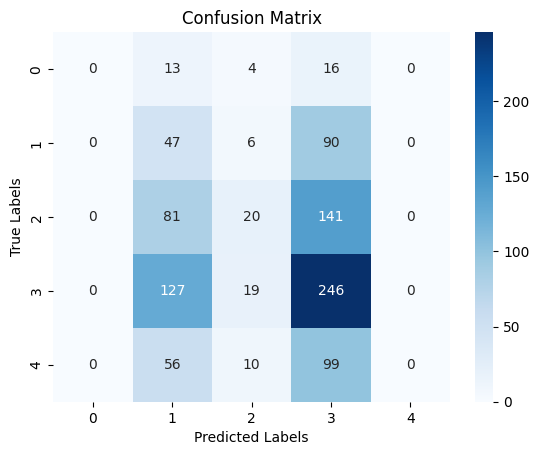

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_labels, predicted_labels)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

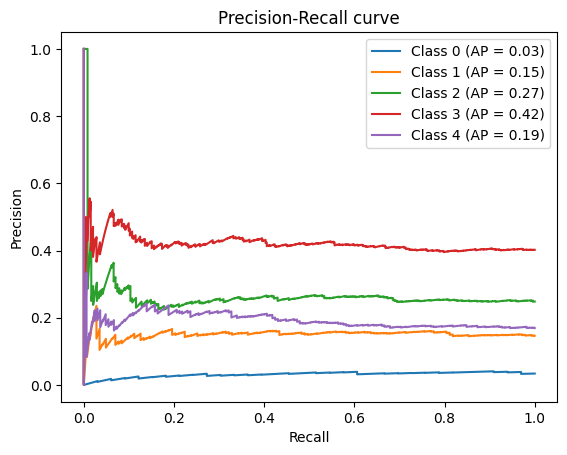

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision = dict()
recall = dict()
average_precision = dict()

for i in range(5):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], predictions[:, i])

plt.figure()
for i in range(5):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="best")
plt.show()


# **Fun-stuff, can we predict ingredients from the image?**

In [ ]:
pi=MLENDYD_df[['Dish_name','Ingredients','Benchmark_A']]
pi=pi.reset_index(drop=False)
pi.head()

filename           Dish_name  \
0  000001.jpg  chicken_katsu_rice   
1  000002.jpg   english_breakfast   
2  000003.jpg       spicy_chicken   
3  000004.jpg         gulab_jamun   
4  000005.jpg      chicken_masala   

                                         Ingredients Benchmark_A  
0              rice,chicken_breast,spicy_curry_sauce       Train  
1  eggs,bacon,hash_brown,tomato,bread,tomato,bake...       Train  
2  chili,chicken,peanuts,sihuan_peppercorns,green...       Train  
3      sugar,water,khoya,milk,salt,oil,cardamon,ghee       Train  
4  chicken,lemon,turmeric,garam_masala,coriander_...       Train

**Obviously we can't deal with such a vast number of ingredients, so let's find the most occuring ones**

**Drop rows with missing values in the Ingredients column**

In [ ]:
pi.dropna(subset=['Ingredients'], inplace=True)

**Splitting ingredients and counting occurrences**

In [ ]:
all_ingredients = pi['Ingredients'].str.split(',', expand=True).stack().value_counts()

**We select the top 24 values**

In [ ]:
all_ingredients.head(24)

salt               1172
onion               734
rice                508
tomato              491
garlic              482
chicken             479
oil                 473
olive_oil           315
water               304
ginger              264
butter              261
egg                 259
onions              254
potato              245
pepper              243
spices              240
cheese              218
sugar               208
turmeric_powder     205
tomatoes            199
flour               193
carrot              180
lettuce             174
milk                172
dtype: int64

**Finding the top 24 recurring ingredients**

In [ ]:
top_ingredients = all_ingredients.head(24).index.tolist()

**We eliminate the rows which don't contain any of the top 24 ingredients**

In [ ]:
pi_filtered = pi[pi['Ingredients'].apply(lambda x: any(item in x for item in top_ingredients))]

print("Filtered DataFrame:")
print(pi_filtered)

Filtered DataFrame:
        filename                         Dish_name  \
0     000001.jpg                chicken_katsu_rice   
1     000002.jpg                 english_breakfast   
2     000003.jpg                     spicy_chicken   
3     000004.jpg                       gulab_jamun   
4     000005.jpg                    chicken_masala   
...          ...                               ...   
3245  003246.jpg                        zeera_rice   
3246  003247.jpg                    paneer_and_dal   
3247  003248.jpg                            samosa   
3248  003249.jpg                        fruit_milk   
3249  003250.jpg  beef_burger_with_onion_and_salad   

                                            Ingredients Benchmark_A  
0                 rice,chicken_breast,spicy_curry_sauce       Train  
1     eggs,bacon,hash_brown,tomato,bread,tomato,bake...       Train  
2     chili,chicken,peanuts,sihuan_peppercorns,green...       Train  
3         sugar,water,khoya,milk,salt,oil,cardamon,

In [ ]:
pi_filtered['Ingredients'] = pi_filtered['Ingredients'].apply(lambda x: ','.join([i for i in x.split(',') if i in top_ingredients]))

print("Filtered DataFrame with top 24 ingredients only:")
print(pi_filtered)

Filtered DataFrame with top 24 ingredients only:
        filename                         Dish_name  \
0     000001.jpg                chicken_katsu_rice   
1     000002.jpg                 english_breakfast   
2     000003.jpg                     spicy_chicken   
3     000004.jpg                       gulab_jamun   
4     000005.jpg                    chicken_masala   
...          ...                               ...   
3245  003246.jpg                        zeera_rice   
3246  003247.jpg                    paneer_and_dal   
3247  003248.jpg                            samosa   
3248  003249.jpg                        fruit_milk   
3249  003250.jpg  beef_burger_with_onion_and_salad   

                                   Ingredients Benchmark_A  
0                                         rice       Train  
1                                tomato,tomato       Train  
2                                      chicken       Train  
3                    sugar,water,milk,salt,oil       Train

<ipython-input-46-454677f9e0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Now, we only have the top 24 ingredients, but for a single dish we may have multiple ingredients from the top 24 list. To deal with this we will repeat the dish with each of the ingredients from the top 24, one at a time**

In [ ]:
expanded_data = []

for _, row in pi_filtered.iterrows():
    dish = row['Dish_name']
    ingredients = row['Ingredients'].split(',')

    for ingredient in ingredients:
        if ingredient in top_ingredients:
            expanded_data.append({'filename': row['filename'], 'Dish_name': dish, 'Ingredients': ingredient, 'Benchmark_A': row['Benchmark_A']})

expanded_df = pd.DataFrame(expanded_data)

print("Expanded DataFrame:")
print(expanded_df)

Expanded DataFrame:
        filename           Dish_name      Ingredients Benchmark_A
0     000001.jpg  chicken_katsu_rice             rice       Train
1     000002.jpg   english_breakfast           tomato       Train
2     000002.jpg   english_breakfast           tomato       Train
3     000003.jpg       spicy_chicken          chicken       Train
4     000004.jpg         gulab_jamun            sugar       Train
...          ...                 ...              ...         ...
8268  003248.jpg              samosa            onion        Test
8269  003248.jpg              samosa             salt        Test
8270  003248.jpg              samosa  turmeric_powder        Test
8271  003248.jpg              samosa           garlic        Test
8272  003249.jpg          fruit_milk             milk       Train

[8273 rows x 4 columns]


**This expands our dataset as well and we will be able to predict better the percentage of prescence of ingredients in a dish**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
image_labels = expanded_df[['filename', 'Ingredients']]

In [ ]:
train_df, valid_df = train_test_split(image_labels, test_size=0.2, random_state=42)

In [ ]:
img_size = (224, 224)
batch_size = 32

In [ ]:
images_directory = '/content/Data/yummy/MLEndYD_images'

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=images_directory,
    x_col='filename',
    y_col='Ingredients',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 6618 validated image filenames belonging to 24 classes.


In [ ]:
valid_generator = datagen.flow_from_dataframe(
    valid_df,
    directory=images_directory,
    x_col='filename',
    y_col='Ingredients',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1655 validated image filenames belonging to 24 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/10
206/206 [==============================] - 360s 2s/step - loss: 3.0872 - accuracy: 0.1222 - val_loss: 2.9852 - val_accuracy: 0.1452
Epoch 2/10
206/206 [==============================] - 358s 2s/step - loss: 2.9349 - accuracy: 0.1362 - val_loss: 2.9737 - val_accuracy: 0.1440
Epoch 3/10
206/206 [==============================] - 335s 2s/step - loss: 2.8756 - accuracy: 0.1485 - val_loss: 2.9814 - val_accuracy: 0.1244
Epoch 4/10
206/206 [==============================] - 341s 2s/step - loss: 2.8278 - accuracy: 0.1497 - val_loss: 2.9735 - val_accuracy: 0.1256
Epoch 5/10
206/206 [==============================] - 332s 2s/step - loss: 2.7714 - accuracy: 0.1562 - val_loss: 3.0026 - val_accuracy: 0.1146
Epoch 6/10
206/206 [==============================] - 338s 2s/step - loss: 2.7251 - accuracy: 0.1719 - val_loss: 2.9702 - val_accuracy: 0.1354
Epoch 7/10
206/206 [==============================] - 341s 2s/step - loss: 2.6822 - accuracy: 0.1761 - val_loss: 3.0134 - val_accuracy: 0.1385

In [ ]:
#model.save('ingredient_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


1/1 [==============================] - 1s 744ms/step
Image: 000006.jpg
Dish Name: chocolate_mousse_portion
Actual Ingredients: water
Predicted Ingredients:
flour: 21.42%
water: 19.47%
chicken: 8.46%
milk: 6.65%
onion: 5.96%
pepper: 5.93%
sugar: 5.39%
salt: 4.98%
oil: 3.66%
rice: 3.06%
garlic: 2.51%
butter: 2.28%
egg: 2.27%
lettuce: 2.09%
cheese: 1.75%
onions: 1.19%
tomato: 0.76%
turmeric_powder: 0.63%
ginger: 0.61%
carrot: 0.27%
potato: 0.24%
olive_oil: 0.20%
tomatoes: 0.12%
spices: 0.10%


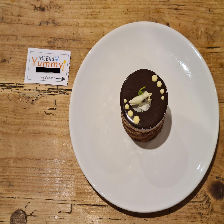

1/1 [==============================] - 0s 25ms/step
Image: 000007.jpg
Dish Name: chicken_cheese_mushroom_wrap
Actual Ingredients: chicken,cheese,salt
Predicted Ingredients:
butter: 17.81%
salt: 9.59%
onion: 8.63%
egg: 8.60%
milk: 7.71%
flour: 6.41%
cheese: 5.83%
oil: 5.74%
olive_oil: 4.77%
rice: 4.15%
chicken: 3.97%
sugar: 3.59%
water: 2.78%
pepper: 2.52%
tomato: 1.65%
garlic: 1.07%
potato: 0.92%
spices: 0.79%
onions: 0.77%
tomatoes: 0.76%
lettuce: 0.66%
ginger: 0.56%
carrot: 0.39%
turmeric_powder: 0.33%


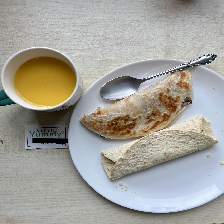

1/1 [==============================] - 0s 26ms/step
Image: 000010.jpg
Dish Name: spiced_mixed_vegetable_curry_with_bread_rolls
Actual Ingredients: tomatoes,onions,butter,turmeric_powder,salt,oil
Predicted Ingredients:
tomatoes: 36.41%
turmeric_powder: 18.43%
salt: 5.90%
onions: 5.45%
rice: 5.07%
water: 4.87%
oil: 4.57%
garlic: 3.49%
chicken: 3.42%
onion: 3.09%
ginger: 1.96%
potato: 1.64%
tomato: 1.21%
cheese: 1.14%
butter: 1.03%
flour: 0.52%
olive_oil: 0.52%
carrot: 0.51%
pepper: 0.27%
spices: 0.26%
sugar: 0.11%
lettuce: 0.07%
egg: 0.06%
milk: 0.01%


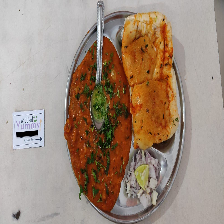

1/1 [==============================] - 0s 27ms/step
Image: 000014.jpg
Dish Name: fudge_chocolate
Actual Ingredients: sugar,salt,milk,butter
Predicted Ingredients:
butter: 20.51%
sugar: 11.77%
salt: 10.84%
potato: 9.77%
milk: 8.56%
pepper: 6.47%
oil: 5.87%
egg: 4.35%
lettuce: 3.42%
olive_oil: 3.13%
chicken: 2.65%
flour: 2.27%
cheese: 2.14%
onions: 1.55%
onion: 1.19%
turmeric_powder: 1.10%
carrot: 0.91%
water: 0.72%
garlic: 0.67%
rice: 0.60%
ginger: 0.60%
tomato: 0.35%
tomatoes: 0.33%
spices: 0.22%


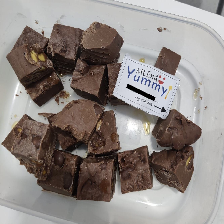

1/1 [==============================] - 0s 23ms/step
Image: 000016.jpg
Dish Name: khichdi
Actual Ingredients: rice,spices
Predicted Ingredients:
onion: 24.96%
oil: 18.74%
salt: 14.22%
rice: 9.33%
garlic: 5.34%
chicken: 3.74%
spices: 3.72%
tomato: 3.61%
potato: 2.94%
ginger: 2.73%
butter: 2.21%
turmeric_powder: 1.85%
tomatoes: 1.47%
pepper: 1.24%
onions: 0.93%
water: 0.75%
olive_oil: 0.49%
egg: 0.40%
milk: 0.39%
sugar: 0.39%
cheese: 0.25%
carrot: 0.17%
lettuce: 0.07%
flour: 0.06%


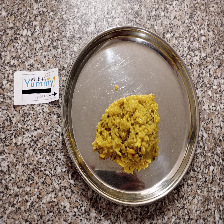

1/1 [==============================] - 0s 22ms/step
Image: 000017.jpg
Dish Name: chilli_cheese_pasta
Actual Ingredients: cheese,turmeric_powder,salt
Predicted Ingredients:
cheese: 18.85%
salt: 15.90%
butter: 11.15%
potato: 10.85%
pepper: 6.38%
egg: 4.95%
olive_oil: 4.42%
oil: 3.52%
onion: 2.79%
sugar: 2.70%
chicken: 2.56%
turmeric_powder: 2.38%
garlic: 2.18%
milk: 2.14%
tomato: 2.03%
lettuce: 1.81%
onions: 1.59%
flour: 0.88%
water: 0.88%
tomatoes: 0.77%
ginger: 0.44%
spices: 0.37%
carrot: 0.32%
rice: 0.13%


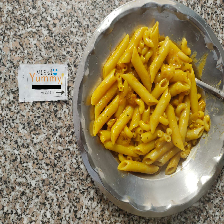

1/1 [==============================] - 0s 23ms/step
Image: 000018.jpg
Dish Name: pepper_chicken_roast
Actual Ingredients: chicken,onion,salt
Predicted Ingredients:
salt: 16.30%
chicken: 13.03%
onion: 12.86%
oil: 9.37%
garlic: 7.38%
turmeric_powder: 7.11%
pepper: 4.70%
onions: 4.68%
rice: 4.19%
tomatoes: 3.35%
ginger: 2.19%
olive_oil: 2.17%
butter: 2.00%
water: 1.81%
potato: 1.67%
spices: 1.57%
egg: 1.48%
tomato: 1.09%
flour: 1.07%
carrot: 0.68%
sugar: 0.51%
milk: 0.45%
cheese: 0.28%
lettuce: 0.09%


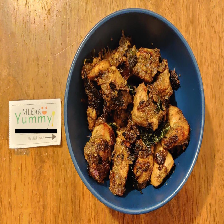

1/1 [==============================] - 0s 23ms/step
Image: 000020.jpg
Dish Name: lentil-based_vegetable_stew_with__rice
Actual Ingredients: 
Predicted Ingredients:
rice: 30.48%
salt: 14.86%
onion: 12.63%
garlic: 7.74%
butter: 4.49%
oil: 3.85%
ginger: 3.76%
olive_oil: 3.04%
pepper: 2.78%
egg: 2.41%
chicken: 2.30%
water: 2.26%
tomato: 1.92%
turmeric_powder: 1.90%
tomatoes: 1.66%
spices: 1.23%
milk: 0.62%
onions: 0.61%
potato: 0.59%
sugar: 0.28%
lettuce: 0.22%
carrot: 0.16%
flour: 0.16%
cheese: 0.07%


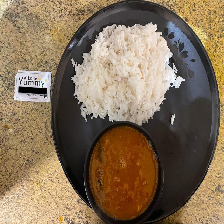

1/1 [==============================] - 0s 22ms/step
Image: 000023.jpg
Dish Name: traditional_breakfast
Actual Ingredients: 
Predicted Ingredients:
lettuce: 38.74%
cheese: 13.67%
onion: 10.61%
salt: 5.73%
potato: 4.12%
garlic: 4.02%
tomato: 4.01%
egg: 3.78%
chicken: 3.15%
carrot: 1.94%
oil: 1.60%
olive_oil: 1.53%
butter: 1.29%
pepper: 1.26%
sugar: 1.11%
flour: 1.11%
tomatoes: 0.65%
onions: 0.43%
water: 0.39%
rice: 0.33%
milk: 0.21%
ginger: 0.16%
turmeric_powder: 0.10%
spices: 0.07%


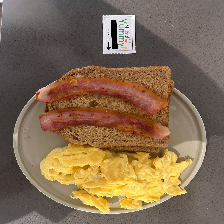

1/1 [==============================] - 0s 24ms/step
Image: 000031.jpg
Dish Name: chappli_kebab
Actual Ingredients: onions,garlic,ginger,tomato,salt
Predicted Ingredients:
onion: 22.74%
salt: 13.90%
rice: 8.67%
chicken: 6.86%
tomato: 5.57%
garlic: 5.34%
olive_oil: 5.33%
spices: 5.12%
oil: 3.96%
ginger: 3.66%
water: 3.56%
pepper: 2.34%
turmeric_powder: 2.31%
butter: 2.29%
tomatoes: 2.15%
onions: 2.06%
egg: 1.34%
potato: 1.01%
carrot: 0.71%
cheese: 0.43%
flour: 0.24%
sugar: 0.19%
milk: 0.17%
lettuce: 0.05%


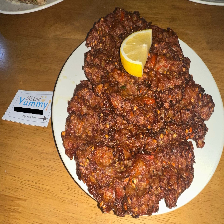

1/1 [==============================] - 0s 23ms/step
Image: 000032.jpg
Dish Name: california_crunchy
Actual Ingredients: flour,salt,pepper
Predicted Ingredients:
pepper: 15.82%
flour: 13.78%
salt: 9.81%
onion: 9.22%
lettuce: 8.63%
egg: 8.29%
garlic: 5.73%
rice: 4.31%
carrot: 4.20%
water: 2.85%
turmeric_powder: 2.69%
sugar: 2.54%
chicken: 2.44%
ginger: 1.75%
olive_oil: 1.43%
onions: 1.39%
milk: 1.28%
oil: 0.95%
tomato: 0.92%
potato: 0.69%
tomatoes: 0.65%
cheese: 0.32%
butter: 0.29%
spices: 0.03%


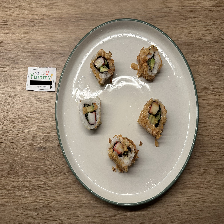

1/1 [==============================] - 0s 21ms/step
Image: 000037.jpg
Dish Name: chicken_sausage_and_nugget
Actual Ingredients: spices,oil
Predicted Ingredients:
salt: 23.05%
onion: 10.23%
oil: 7.71%
flour: 7.34%
egg: 7.07%
chicken: 6.01%
spices: 5.07%
pepper: 3.61%
garlic: 3.60%
butter: 3.52%
ginger: 2.67%
rice: 2.58%
potato: 2.44%
tomato: 2.23%
cheese: 2.18%
olive_oil: 1.98%
sugar: 1.85%
onions: 1.36%
water: 1.14%
tomatoes: 1.13%
milk: 0.91%
carrot: 0.89%
turmeric_powder: 0.82%
lettuce: 0.59%


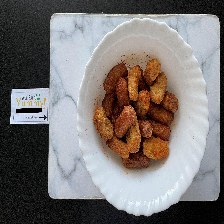

1/1 [==============================] - 0s 22ms/step
Image: 000038.jpg
Dish Name: rice_with_chicken_curry
Actual Ingredients: chicken,turmeric_powder,onion,tomato,salt
Predicted Ingredients:
onion: 23.29%
salt: 15.61%
turmeric_powder: 11.27%
rice: 9.46%
garlic: 6.74%
chicken: 4.89%
butter: 4.83%
ginger: 4.33%
tomato: 4.31%
water: 2.83%
pepper: 2.79%
olive_oil: 1.65%
tomatoes: 1.54%
egg: 1.26%
onions: 1.09%
oil: 1.03%
flour: 0.62%
sugar: 0.58%
potato: 0.55%
milk: 0.42%
spices: 0.37%
carrot: 0.29%
cheese: 0.18%
lettuce: 0.08%


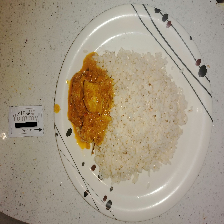

1/1 [==============================] - 0s 21ms/step
Image: 000039.jpg
Dish Name: khichidi
Actual Ingredients: rice,ginger
Predicted Ingredients:
rice: 24.49%
onion: 16.38%
salt: 9.79%
ginger: 9.05%
garlic: 5.33%
butter: 5.11%
water: 4.92%
tomatoes: 3.35%
oil: 2.81%
tomato: 2.48%
olive_oil: 2.47%
chicken: 2.04%
turmeric_powder: 1.81%
onions: 1.70%
pepper: 1.66%
egg: 1.35%
potato: 1.25%
milk: 1.22%
sugar: 0.94%
spices: 0.89%
carrot: 0.35%
flour: 0.30%
cheese: 0.16%
lettuce: 0.14%


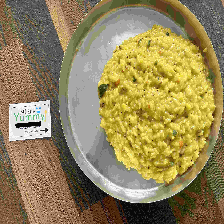

1/1 [==============================] - 0s 24ms/step
Image: 000040.jpg
Dish Name: chicken_biryani
Actual Ingredients: rice,chicken
Predicted Ingredients:
garlic: 18.67%
rice: 15.03%
onion: 13.72%
salt: 10.87%
oil: 7.58%
chicken: 7.54%
tomatoes: 4.91%
ginger: 2.85%
egg: 2.76%
carrot: 2.43%
pepper: 1.79%
spices: 1.66%
olive_oil: 1.49%
onions: 1.34%
cheese: 1.07%
water: 1.04%
turmeric_powder: 0.98%
butter: 0.94%
sugar: 0.87%
tomato: 0.84%
flour: 0.58%
potato: 0.37%
lettuce: 0.31%
milk: 0.31%


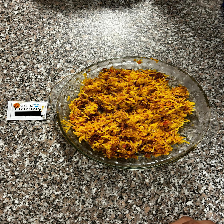

1/1 [==============================] - 0s 22ms/step
Image: 000041.jpg
Dish Name: pav_bhaji
Actual Ingredients: carrot,potato,butter,onion,tomato
Predicted Ingredients:
potato: 25.79%
onion: 19.56%
cheese: 9.52%
tomato: 8.93%
chicken: 5.81%
butter: 4.69%
salt: 3.59%
sugar: 3.52%
lettuce: 3.15%
egg: 1.67%
pepper: 1.53%
tomatoes: 1.46%
milk: 1.45%
oil: 1.33%
water: 1.31%
olive_oil: 1.25%
rice: 0.96%
ginger: 0.86%
garlic: 0.83%
flour: 0.77%
carrot: 0.71%
onions: 0.58%
turmeric_powder: 0.40%
spices: 0.31%


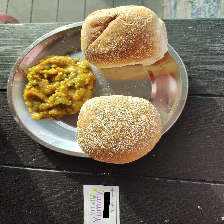

1/1 [==============================] - 0s 22ms/step
Image: 000042.jpg
Dish Name: chicken_pad_thai
Actual Ingredients: chicken
Predicted Ingredients:
garlic: 19.35%
olive_oil: 13.31%
onion: 12.00%
salt: 10.33%
chicken: 8.22%
carrot: 4.22%
tomatoes: 4.09%
onions: 3.35%
tomato: 3.20%
cheese: 2.92%
oil: 2.83%
pepper: 2.58%
lettuce: 2.30%
egg: 2.12%
butter: 1.95%
potato: 1.90%
ginger: 1.63%
rice: 1.53%
spices: 1.17%
flour: 0.34%
water: 0.30%
turmeric_powder: 0.15%
sugar: 0.14%
milk: 0.07%


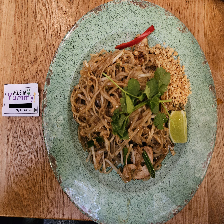

1/1 [==============================] - 0s 22ms/step
Image: 000043.jpg
Dish Name: chicken
Actual Ingredients: chicken,oil,flour,egg
Predicted Ingredients:
flour: 25.59%
chicken: 9.87%
garlic: 8.27%
salt: 8.13%
onion: 6.75%
egg: 5.70%
oil: 5.39%
turmeric_powder: 5.11%
olive_oil: 3.23%
water: 2.78%
rice: 2.53%
carrot: 2.37%
sugar: 2.31%
pepper: 2.04%
tomato: 1.82%
potato: 1.70%
onions: 1.58%
ginger: 1.35%
tomatoes: 0.85%
butter: 0.68%
spices: 0.62%
lettuce: 0.62%
milk: 0.47%
cheese: 0.22%


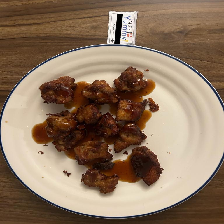

1/1 [==============================] - 0s 22ms/step
Image: 000045.jpg
Dish Name: thai_green_curry
Actual Ingredients: chicken,rice
Predicted Ingredients:
garlic: 17.07%
onion: 11.13%
tomato: 9.96%
chicken: 9.48%
salt: 7.53%
rice: 6.92%
egg: 5.89%
onions: 3.23%
potato: 3.18%
olive_oil: 3.04%
turmeric_powder: 2.85%
lettuce: 2.55%
flour: 2.42%
carrot: 2.05%
ginger: 2.03%
water: 1.94%
tomatoes: 1.81%
butter: 1.69%
sugar: 1.54%
oil: 1.32%
cheese: 1.05%
pepper: 0.90%
spices: 0.29%
milk: 0.16%


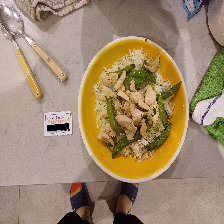

1/1 [==============================] - 0s 22ms/step
Image: 000047.jpg
Dish Name: sweet_scrambled_egg,toasted_bread_and_banana_slices
Actual Ingredients: butter,egg,sugar,milk
Predicted Ingredients:
onion: 12.90%
butter: 10.71%
oil: 10.02%
salt: 8.36%
cheese: 6.42%
milk: 6.10%
tomato: 5.42%
chicken: 5.39%
rice: 5.03%
egg: 4.13%
sugar: 3.30%
water: 3.29%
flour: 3.10%
tomatoes: 3.07%
olive_oil: 2.74%
onions: 1.76%
pepper: 1.71%
potato: 1.70%
ginger: 1.21%
garlic: 1.15%
turmeric_powder: 1.12%
spices: 0.95%
carrot: 0.25%
lettuce: 0.17%


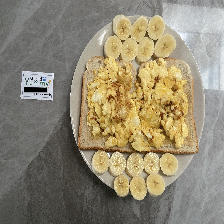

1/1 [==============================] - 0s 22ms/step
Image: 000051.jpg
Dish Name: broasted_chicken
Actual Ingredients: chicken,flour,pepper,salt
Predicted Ingredients:
rice: 42.23%
onion: 12.34%
chicken: 9.26%
garlic: 7.59%
salt: 5.70%
ginger: 3.17%
butter: 2.33%
oil: 2.30%
olive_oil: 2.13%
carrot: 2.08%
pepper: 1.59%
tomato: 1.48%
flour: 1.43%
water: 1.43%
egg: 1.31%
tomatoes: 0.99%
lettuce: 0.85%
cheese: 0.44%
spices: 0.36%
potato: 0.30%
turmeric_powder: 0.26%
onions: 0.17%
sugar: 0.14%
milk: 0.12%


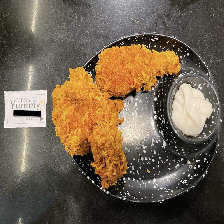

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Data/ingredient_detection_model.h5')

# Filter images where Benchmark_A == Test
filtered_data = pi_filtered[pi_filtered['Benchmark_A'] == 'Test']
counter=0

for index, row in filtered_data.iterrows():
    if counter >20:
      break
    img_path = '/content/Data/yummy/MLEndYD_images/' + row['filename']
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize pixel values

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class labels and their corresponding indices
    class_indices = train_generator.class_indices

    # Reverse the dictionary to map indices to class labels
    inverse_class_indices = {v: k for k, v in class_indices.items()}

    # Display predicted ingredients and their confidence levels
    top_classes = 24
    top_predicted_classes = np.argsort(predictions[0])[-top_classes:][::-1]

    print(f"Image: {row['filename']}")
    print(f"Dish Name: {row['Dish_name']}")
    print(f"Actual Ingredients: {row['Ingredients']}")
    print("Predicted Ingredients:")
    for predicted_class in top_predicted_classes:
        class_label = inverse_class_indices[predicted_class]
        confidence = predictions[0][predicted_class] * 100
        print(f"{class_label}: {confidence:.2f}%")

    # Display the image
    display(img)
    counter+=1

**Repeating the same experiment with lesser ingredients**

In [ ]:
top_ingredients = all_ingredients.head(7).index.tolist()

In [ ]:
top_ingredients

['salt', 'onion', 'rice', 'tomato', 'garlic', 'chicken', 'oil']

In [ ]:
pi_filtered = pi[pi['Ingredients'].apply(lambda x: any(item in x for item in top_ingredients))]

print("Filtered DataFrame:")
print(pi_filtered)

Filtered DataFrame:
        filename                         Dish_name  \
0     000001.jpg                chicken_katsu_rice   
1     000002.jpg                 english_breakfast   
2     000003.jpg                     spicy_chicken   
3     000004.jpg                       gulab_jamun   
4     000005.jpg                    chicken_masala   
...          ...                               ...   
3243  003244.jpg                           khichdi   
3244  003245.jpg               spaghetti_bolognese   
3245  003246.jpg                        zeera_rice   
3247  003248.jpg                            samosa   
3249  003250.jpg  beef_burger_with_onion_and_salad   

                                            Ingredients Benchmark_A  
0                 rice,chicken_breast,spicy_curry_sauce       Train  
1     eggs,bacon,hash_brown,tomato,bread,tomato,bake...       Train  
2     chili,chicken,peanuts,sihuan_peppercorns,green...       Train  
3         sugar,water,khoya,milk,salt,oil,cardamon,

In [ ]:
pi_filtered['Ingredients'] = pi_filtered['Ingredients'].apply(lambda x: ','.join([i for i in x.split(',') if i in top_ingredients]))

print("Filtered DataFrame with top 24 ingredients only:")
print(pi_filtered)

Filtered DataFrame with top 24 ingredients only:
        filename                         Dish_name          Ingredients  \
0     000001.jpg                chicken_katsu_rice                 rice   
1     000002.jpg                 english_breakfast        tomato,tomato   
2     000003.jpg                     spicy_chicken              chicken   
3     000004.jpg                       gulab_jamun             salt,oil   
4     000005.jpg                    chicken_masala         chicken,salt   
...          ...                               ...                  ...   
3243  003244.jpg                           khichdi            rice,salt   
3244  003245.jpg               spaghetti_bolognese  onion,garlic,tomato   
3245  003246.jpg                        zeera_rice                        
3247  003248.jpg                            samosa    onion,salt,garlic   
3249  003250.jpg  beef_burger_with_onion_and_salad                        

     Benchmark_A  
0          Train  
1          T

<ipython-input-61-454677f9e0fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
expanded_data = []

for _, row in pi_filtered.iterrows():
    dish = row['Dish_name']
    ingredients = row['Ingredients'].split(',')

    for ingredient in ingredients:
        if ingredient in top_ingredients:
            expanded_data.append({'filename': row['filename'], 'Dish_name': dish, 'Ingredients': ingredient, 'Benchmark_A': row['Benchmark_A']})

expanded_df = pd.DataFrame(expanded_data)

print("Expanded DataFrame:")
print(expanded_df)

Expanded DataFrame:
        filename            Dish_name Ingredients Benchmark_A
0     000001.jpg   chicken_katsu_rice        rice       Train
1     000002.jpg    english_breakfast      tomato       Train
2     000002.jpg    english_breakfast      tomato       Train
3     000003.jpg        spicy_chicken     chicken       Train
4     000004.jpg          gulab_jamun        salt       Train
...          ...                  ...         ...         ...
4334  003245.jpg  spaghetti_bolognese      garlic       Train
4335  003245.jpg  spaghetti_bolognese      tomato       Train
4336  003248.jpg               samosa       onion        Test
4337  003248.jpg               samosa        salt        Test
4338  003248.jpg               samosa      garlic        Test

[4339 rows x 4 columns]


In [ ]:
image_labels = expanded_df[['filename', 'Ingredients']]

In [ ]:
train_df, valid_df = train_test_split(image_labels, test_size=0.2, random_state=42)

In [ ]:
img_size = (224, 224)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory=images_directory,
    x_col='filename',
    y_col='Ingredients',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3471 validated image filenames belonging to 7 classes.


In [ ]:
valid_generator = datagen.flow_from_dataframe(
    valid_df,
    directory=images_directory,
    x_col='filename',
    y_col='Ingredients',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 868 validated image filenames belonging to 7 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

Epoch 1/30
108/108 [==============================] - 202s 2s/step - loss: 2.0228 - accuracy: 0.2256 - val_loss: 1.8545 - val_accuracy: 0.2743
Epoch 2/30
108/108 [==============================] - 186s 2s/step - loss: 1.8408 - accuracy: 0.2664 - val_loss: 1.8691 - val_accuracy: 0.2847
Epoch 3/30
108/108 [==============================] - 187s 2s/step - loss: 1.8119 - accuracy: 0.2701 - val_loss: 1.8629 - val_accuracy: 0.2604
Epoch 4/30
108/108 [==============================] - 190s 2s/step - loss: 1.7849 - accuracy: 0.2821 - val_loss: 1.8855 - val_accuracy: 0.2350
Epoch 5/30
108/108 [==============================] - 191s 2s/step - loss: 1.7517 - accuracy: 0.3004 - val_loss: 1.9086 - val_accuracy: 0.2245
Epoch 6/30
108/108 [==============================] - 193s 2s/step - loss: 1.7365 - accuracy: 0.3039 - val_loss: 1.9093 - val_accuracy: 0.2303
Epoch 7/30
108/108 [==============================] - 185s 2s/step - loss: 1.7056 - accuracy: 0.3140 - val_loss: 1.9156 - val_accuracy: 0.2593

In [ ]:
model.save('/content/drive/MyDrive/Data/ingredient_detection_7_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


1/1 [==============================] - 1s 982ms/step
Image: 000006.jpg
Dish Name: chocolate_mousse_portion
Actual Ingredients: 
Predicted Ingredients:
salt: 50.00%
garlic: 23.03%
onion: 11.37%
oil: 11.26%
rice: 2.77%
chicken: 1.24%
tomato: 0.33%


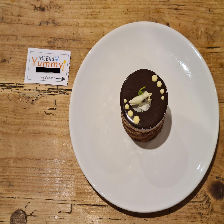

1/1 [==============================] - 0s 33ms/step
Image: 000007.jpg
Dish Name: chicken_cheese_mushroom_wrap
Actual Ingredients: chicken,salt
Predicted Ingredients:
salt: 73.66%
onion: 9.97%
oil: 8.28%
tomato: 2.80%
rice: 2.17%
chicken: 2.02%
garlic: 1.09%


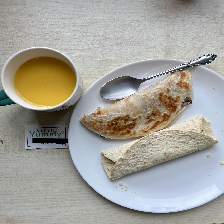

1/1 [==============================] - 0s 29ms/step
Image: 000010.jpg
Dish Name: spiced_mixed_vegetable_curry_with_bread_rolls
Actual Ingredients: salt,oil
Predicted Ingredients:
salt: 84.93%
oil: 7.55%
tomato: 4.33%
onion: 1.51%
rice: 1.00%
chicken: 0.43%
garlic: 0.25%


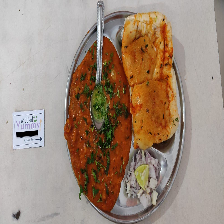

1/1 [==============================] - 0s 25ms/step
Image: 000014.jpg
Dish Name: fudge_chocolate
Actual Ingredients: salt
Predicted Ingredients:
salt: 68.43%
garlic: 14.54%
chicken: 10.42%
oil: 3.40%
onion: 2.89%
tomato: 0.27%
rice: 0.06%


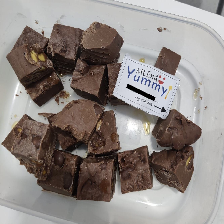

1/1 [==============================] - 0s 38ms/step
Image: 000016.jpg
Dish Name: khichdi
Actual Ingredients: rice
Predicted Ingredients:
rice: 70.29%
oil: 14.38%
onion: 9.43%
salt: 3.96%
garlic: 1.47%
chicken: 0.27%
tomato: 0.21%


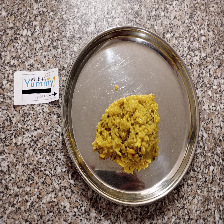

1/1 [==============================] - 0s 29ms/step
Image: 000017.jpg
Dish Name: chilli_cheese_pasta
Actual Ingredients: salt
Predicted Ingredients:
salt: 98.04%
onion: 0.56%
garlic: 0.55%
chicken: 0.44%
tomato: 0.35%
oil: 0.05%
rice: 0.00%


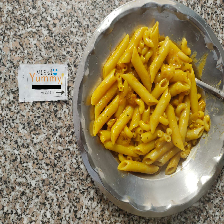

1/1 [==============================] - 0s 26ms/step
Image: 000018.jpg
Dish Name: pepper_chicken_roast
Actual Ingredients: chicken,onion,salt
Predicted Ingredients:
salt: 56.89%
onion: 20.45%
chicken: 9.42%
garlic: 6.90%
oil: 3.09%
rice: 2.49%
tomato: 0.76%


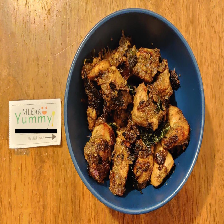

1/1 [==============================] - 0s 25ms/step
Image: 000020.jpg
Dish Name: lentil-based_vegetable_stew_with__rice
Actual Ingredients: 
Predicted Ingredients:
rice: 44.32%
salt: 41.31%
onion: 6.09%
chicken: 2.66%
tomato: 2.42%
garlic: 1.93%
oil: 1.27%


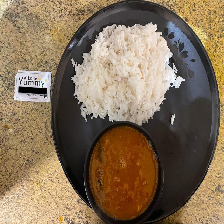

1/1 [==============================] - 0s 28ms/step
Image: 000031.jpg
Dish Name: chappli_kebab
Actual Ingredients: garlic,tomato,salt
Predicted Ingredients:
tomato: 24.09%
chicken: 23.01%
garlic: 16.45%
salt: 14.11%
onion: 13.99%
oil: 5.85%
rice: 2.49%


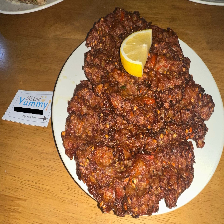

1/1 [==============================] - 0s 29ms/step
Image: 000032.jpg
Dish Name: california_crunchy
Actual Ingredients: salt
Predicted Ingredients:
salt: 77.52%
rice: 13.38%
oil: 3.24%
onion: 2.00%
garlic: 1.61%
tomato: 1.33%
chicken: 0.92%


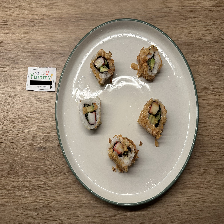

1/1 [==============================] - 0s 31ms/step
Image: 000037.jpg
Dish Name: chicken_sausage_and_nugget
Actual Ingredients: oil
Predicted Ingredients:
oil: 46.62%
salt: 26.66%
onion: 12.64%
garlic: 10.88%
tomato: 2.33%
chicken: 0.73%
rice: 0.14%


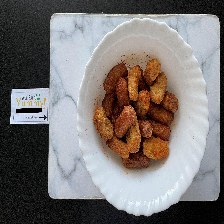

1/1 [==============================] - 0s 26ms/step
Image: 000038.jpg
Dish Name: rice_with_chicken_curry
Actual Ingredients: chicken,onion,tomato,salt
Predicted Ingredients:
onion: 58.47%
chicken: 26.74%
salt: 7.47%
tomato: 3.42%
rice: 1.95%
garlic: 1.43%
oil: 0.50%


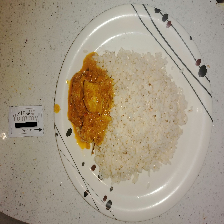

1/1 [==============================] - 0s 25ms/step
Image: 000039.jpg
Dish Name: khichidi
Actual Ingredients: rice
Predicted Ingredients:
rice: 56.77%
salt: 12.29%
onion: 10.93%
tomato: 9.90%
garlic: 7.51%
oil: 1.61%
chicken: 0.99%


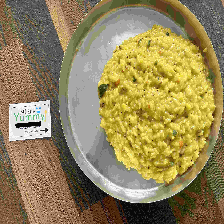

1/1 [==============================] - 0s 24ms/step
Image: 000040.jpg
Dish Name: chicken_biryani
Actual Ingredients: rice,chicken
Predicted Ingredients:
salt: 43.67%
onion: 15.36%
chicken: 14.05%
rice: 10.75%
oil: 8.60%
garlic: 5.00%
tomato: 2.57%


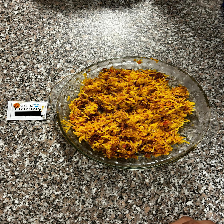

1/1 [==============================] - 0s 26ms/step
Image: 000041.jpg
Dish Name: pav_bhaji
Actual Ingredients: onion,tomato
Predicted Ingredients:
tomato: 66.38%
onion: 28.99%
chicken: 4.11%
salt: 0.28%
oil: 0.12%
rice: 0.07%
garlic: 0.05%


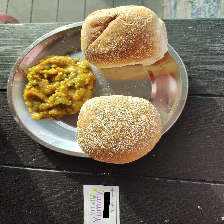

1/1 [==============================] - 0s 26ms/step
Image: 000042.jpg
Dish Name: chicken_pad_thai
Actual Ingredients: chicken
Predicted Ingredients:
chicken: 56.59%
garlic: 10.59%
salt: 9.60%
oil: 9.49%
onion: 8.93%
tomato: 3.64%
rice: 1.17%


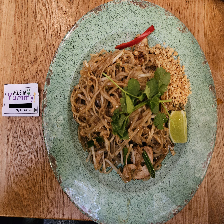

1/1 [==============================] - 0s 30ms/step
Image: 000043.jpg
Dish Name: chicken
Actual Ingredients: chicken,oil
Predicted Ingredients:
oil: 67.15%
chicken: 20.76%
garlic: 3.85%
salt: 3.59%
onion: 2.98%
rice: 1.16%
tomato: 0.50%


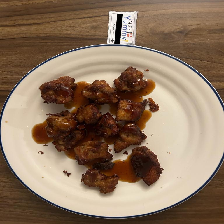

1/1 [==============================] - 0s 27ms/step
Image: 000045.jpg
Dish Name: thai_green_curry
Actual Ingredients: chicken,rice
Predicted Ingredients:
rice: 90.30%
chicken: 4.87%
salt: 2.24%
onion: 1.53%
garlic: 0.99%
tomato: 0.04%
oil: 0.03%


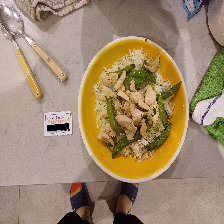

1/1 [==============================] - 0s 25ms/step
Image: 000051.jpg
Dish Name: broasted_chicken
Actual Ingredients: chicken,salt
Predicted Ingredients:
salt: 67.35%
chicken: 13.36%
rice: 10.80%
tomato: 2.99%
onion: 2.55%
oil: 1.68%
garlic: 1.26%


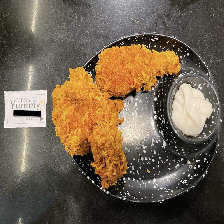

1/1 [==============================] - 0s 27ms/step
Image: 000056.jpg
Dish Name: rice_and_beef_meatballs
Actual Ingredients: 
Predicted Ingredients:
garlic: 46.31%
salt: 26.79%
rice: 14.28%
onion: 6.67%
oil: 3.64%
chicken: 1.80%
tomato: 0.52%


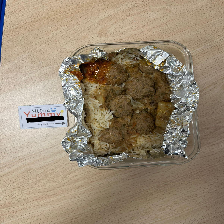

1/1 [==============================] - 0s 30ms/step
Image: 000057.jpg
Dish Name: green_gram_lentil
Actual Ingredients: garlic,onion
Predicted Ingredients:
onion: 50.16%
garlic: 20.39%
salt: 12.49%
oil: 7.03%
rice: 6.58%
chicken: 1.73%
tomato: 1.61%


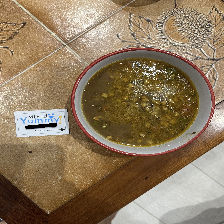

In [ ]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/MyDrive/Data/ingredient_detection_7_model.h5')

# Filter images where Benchmark_A == Test
filtered_data = pi_filtered[pi_filtered['Benchmark_A'] == 'Test']
counter=0

for index, row in filtered_data.iterrows():
    if counter >20:
      break
    img_path = '/content/Data/yummy/MLEndYD_images/' + row['filename']
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize pixel values

    # Make predictions on the image
    predictions = model.predict(img_array)

    # Get the class labels and their corresponding indices
    class_indices = train_generator.class_indices

    # Reverse the dictionary to map indices to class labels
    inverse_class_indices = {v: k for k, v in class_indices.items()}

    # Display predicted ingredients and their confidence levels
    top_classes = 7
    top_predicted_classes = np.argsort(predictions[0])[-top_classes:][::-1]

    print(f"Image: {row['filename']}")
    print(f"Dish Name: {row['Dish_name']}")
    print(f"Actual Ingredients: {row['Ingredients']}")
    print("Predicted Ingredients:")
    for predicted_class in top_predicted_classes:
        class_label = inverse_class_indices[predicted_class]
        confidence = predictions[0][predicted_class] * 100
        print(f"{class_label}: {confidence:.2f}%")

    # Display the image
    display(img)
    counter+=1

# **8) Conclusions**

**A) Relationship between Healthiness and Liking a Dish**

The correlation coefficient obtained was 0.1486837438511339

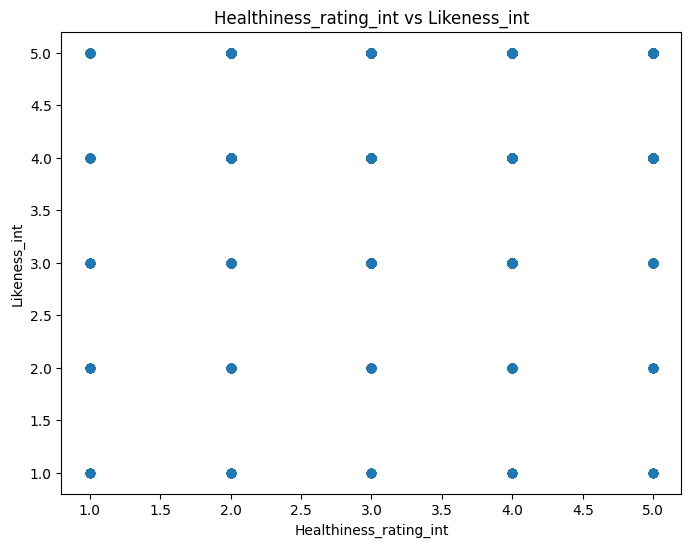


Therefore, we can conclude that there is an extremely weak almost non-existing relationship between taste and healthiness of a dish

**B) Relationship between Food Presentation and Likeness**

Overall accuracy obtained : 0.41067761182785034

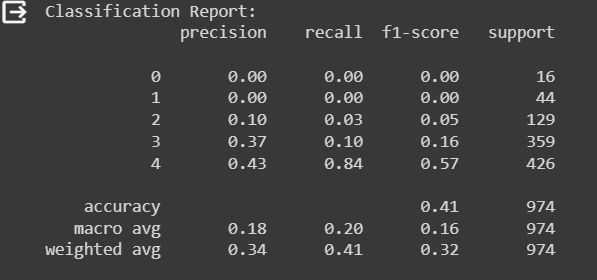



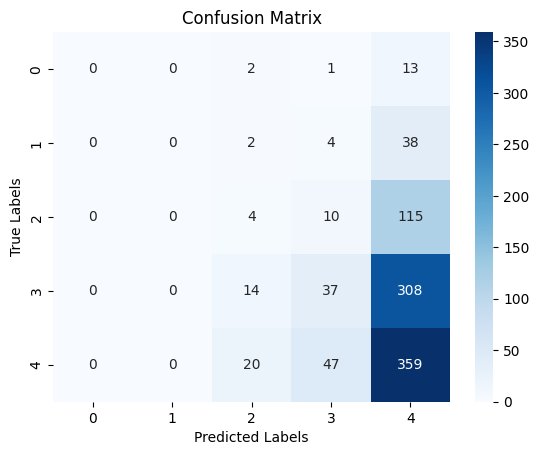


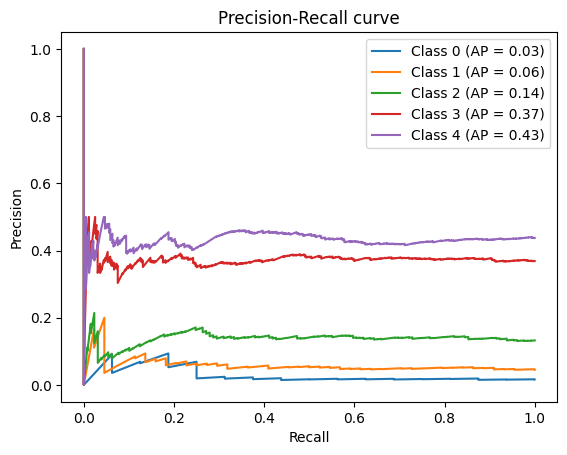



These metrics highly suggest that our neural network was unable to predict the Likeness rating of the dish just based on the looks/presentation of the dish. So, it can be said that how much a person likes a dish is not solely dependent on its presentation

**C) Does Healthy Food Look Bad?**

Overall Accuracy : 0.32102563977241516

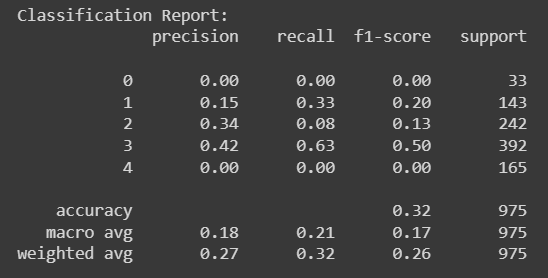


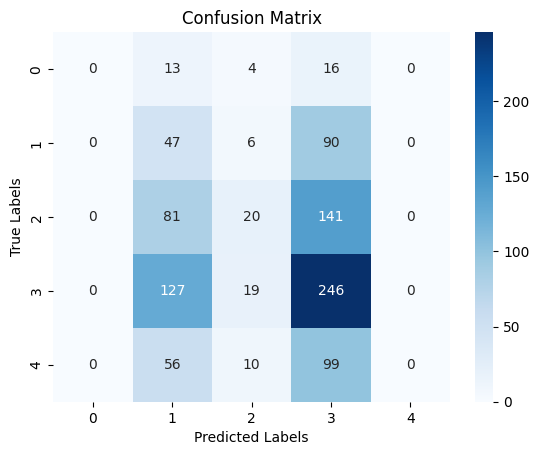

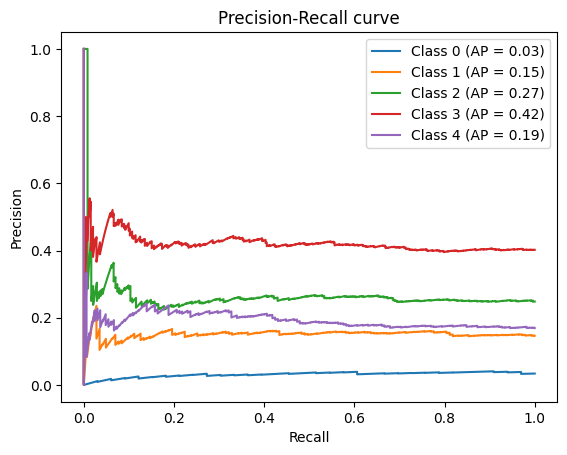


We can arrive at a similar conclusion as we did in the previous case, the metrics suggest that there was not a lot of certainty with which our Neural Netowrk Classifier was able to predict the Healthiness Rating of a dish. If there had been some kind of negative correlation that healthy food looks bad, we would have observed that in the predictions. But it can't be observed. So, healthy food doesn't necessarily look bad.




**D) Predicting the ingredients from the images**
Using MobileNetV2 and transfer learning we created a model which essentially predict the ingredients in a dish that too with a great accuracy and great confidence levels. It generally never happens that a dish has 24 unique ingredients, but in order to observe the performance difference if the number of ingredients to be predicted is decreased to say 4,5 or even 6, 24 was taken.

Generally a dish has 5-6 unique ingredients, so our model works great and predicts the unique ingredients in a dish.

I conducted this experiment several times and obtained weights for different number of ingredients, I have weights file for 4, 7 and 24 ingredients respectively.

The training takes a lot of time so I could try for 30 epochs max, if we increase the number of epochs to say 75, we may obtain even better scores

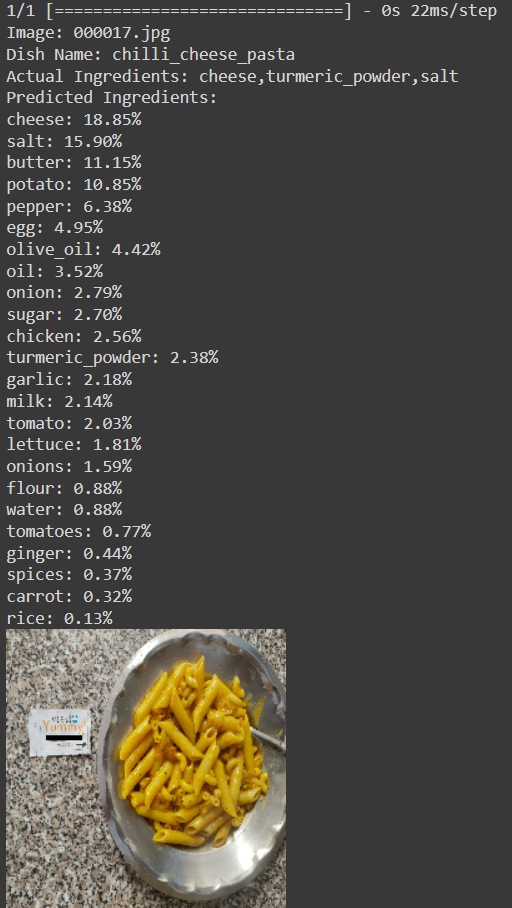

Obviously, the number of ingredients to be detected is so large 24, so the confidence scores are low, but if we take into consideration that we are detecting such a large number of classes, these confidence scores are awesome. If we decrease the number of classes to say 7 or something, we start getting great confidence scores as well, which I have implemented already in the cell above. I obtained the best accuracy when I only selected the number of classes to be 4. What I imply is that the accuracy scores are negatively correlated with the number of dishes we set out to predict!